#**Neural decoding of InterAxon Muse data using a recurrent convolutional neural network**

Andrew Perez

//

##**Abstract**
> This project studies the application of Recurrent Convolutional Neural Networks (R-CNN) for decoding neural signals acquired from an InterAxon Muse, an electroencephalogram (EEG) device. By combining the strengths of recurrent neural networks (RNN) and convolutional neural networks (CNN), the proposed model aims to find patterns in encoded neural signals. Data from the MindBigData open database, collected using the Muse, undergoes preprocessing for R-CNN analysis. Microsoft Excel is used for data cleaning and preparation, with 4 electrodes capturing data in a time-series amplitude format. The dataset involves single-patient neural activity in response to digit stimuli. The project goes over data processing steps and the construction of a C-RNN architecture, including the addition of layers and adjustments of hyperparameters. Results indicate that the model achieves over 88% accuracy after 100 epochs, demonstrating the efficacy of the proposed approach.

##**Introduction**
>Recurrent convolutional neural networks (R-CNN) have been a pivotal development in decoding neural signals. Many groups have shown that R-CNN models have the highest decoding accuracy among other neural networks. This project aims to apply a R-CNN to find patterns among data retrieved with an InterAxon Muse. By combining the modeling capabilities of recurrent neural networks (RNN) with the feature extraction abilities of convolutional neural networks (CNN), the proposed model aims to find trends in encoded neural signals.

>The InterAxon Muse is an innovative electroencephalogram (EEG) device that provides a portable and user-friendly platform for acquiring real-time neural data. The device is a headset that captures neural signals with wireless connectivity.

>Data for this project was supplied by the MindBigData open database. After searching through the different datasets to find one that had a somewhat identifiable pattern, the InterAxon Muse data was selected. This dataset is one of the most studied datasets of neural activity. Data was collected from a single patient where they were shown a digit (from -1 to 9) for 2 seconds. Since the data is given as a .txt file, additional data preparing steps were necessary to use a R-CNN. In total, 4 electrodes were capturing data (*Figure 1*), which were collected into a time-series amplitude of the signal. The Muse's data is recorded as whole integers. The Muse's electrodes sit on the surface of the skin around the skull.

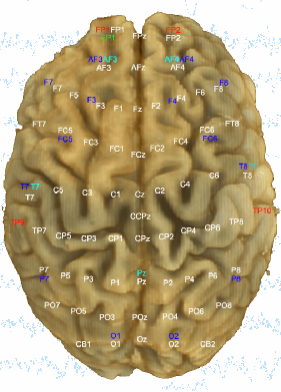

*Figure 1*: The Muse's electrodes are notated in red (TP9, FP1, FP2, and TP10 from left to right).

>MindBigData does not provide any sort of supporting information beyond the data itself. All architecture, code, ideas, and methods that are used in this project have been created by me for the sole purpose of this project. If there is any confusion about this, please visit the [MindBigData](https://mindbigdata.com/opendb/index.html) repository to view where the source data came from and what supplementary information was given.

##**Methods**

>As mentioned in the Introduction, the data provided by MindBigData is given in a .txt file where neural singal data is separated by a comma. In order to convert this type of dataset into something usable by a C-RNN, I had to preprocess the data. To do this, I decided to use Microsoft Excel for data cleaning and preparation. I chose Excel because I was more comfortable manipulating the data this way. It may be more efficient to do this in python. An example of the output signal from one sensor shown in a plot that the signal is relatively clear and should be usable for the C-RNN (*Figure 2*).


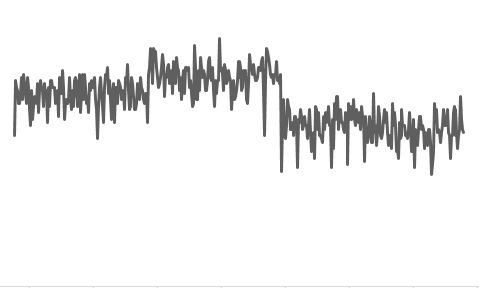

Figure 2: An example of the output signal from the dataset. This particular example is of the number 6 from the FP2 sensor.

>Example data from MindBigData: 978111	132669	MU	TP9	6	459	475,474,477,486,486,476,479,483,489,483,482,485,486,483,474,475, ...

>The data is labeled via MindBigData in the following way: [ID] [Event] [Device] [Channel] [Code] [Size] [Data, Data, ...]. ID and Event are unique identifiers used for keeping track of the data during collection. Device is a code used to identify the device used, since this dataset contains data from a variety of different devices. Channel indicates which electrode the data is collected from. Code indicates which number was shown to the patient. Finally, Size indicates how many datapoints are in the dataset.

>The data from the .txt was copied into an Excel spreadsheet. From there, I used the Text to Column function to separate the data via the commas and spaces (*Figure 3*). Then, the data was saved as a .csv for use in python. As a note, a total of 163,000 rows of data were used for this project. MindBigData has released a new dataset with even more data points. Using the newer dataset might provide a higher model accuracy, but may also lead to overfitting.  


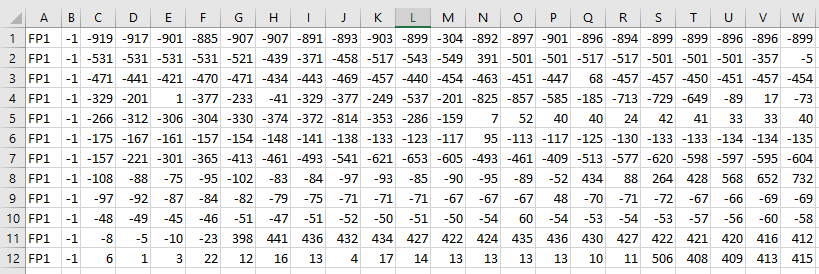

Figure 3: The dataset used to generate the plots given to the C-RNN. Column A represents the sensor which the data was recorded. Column B indicates what number was shown to the patient. Columns D - [ ] are signal data.

>Things like the ID, Event, Device, and Size were removed from the dataset to reduce the size of the dataset. This information would not be necessary to train the model. To additionally clean and create uniform datasets, the length of each test was shortened to the shortest test (408 data points). After quickly analyzing the data that was collected after the initial 408 data points, it contained relatively flat signal and did not likely impact the model. The data was then sorted by what sensor was recording the data and then by which sensor was recording the data. This was done to hopefully identify a trend amongst the different sensors. The C-RNN can identify which number was shown. It could be possible to have the C-RNN also trained on sensor data and number data.

>Outlier data was identified by sorting the peak to peak signal value and removing tests that were +/- 100 from the average of the entire number for each sensor. Since the plots were not shown with axes, the data did not need to be offset. It is important to note that if the axes were shown to the model, the data would need to be further processed.

>If you are interested in running this code, please have the data file in your drive. Find the data file here: [MindBigData.csv](https://drive.google.com/file/d/1S1ut3mR7poG22qZ25ngVzk8_dndgMn74/view?usp=sharing). Review supplementary figures for further instructions.


In [ ]:
# DO NOT RUN THIS SECTION WITHOUT DATA FILE IN YOUR DRIVE
# Input data too large to use a source like GitHub to pull into Colab

import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

full_data = pd.read_csv('/content/drive/MyDrive/MindBigData.csv')

full_data.head()

Mounted at /content/drive


,FP1,-1,-919,-917,-901,-885,-907,-907.1,-891,-893,...,599,596.1,595.1,320,589.2,573.1,566.1,564,556,555.2
0,FP1,-1,-531,-531,-531,-531,-521,-439,-371,-458,...,1118,1111,1108,1101,596,1101,1098,1093,1083,1077
1,FP1,-1,-471,-441,-421,-470,-471,-434,-443,-469,...,406,435,412,428,392,403,429,516,425,405
2,FP1,-1,-329,-201,1,-377,-233,-41,-329,-377,...,-119,-145,-177,-183,-205,-233,-255,-283,-293,-295
3,FP1,-1,-266,-312,-306,-304,-330,-374,-372,-814,...,331,240,240,233,231,244,246,239,235,236
4,FP1,-1,-175,-167,-161,-157,-154,-148,-141,-138,...,560,559,557,559,581,555,554,551,549,549


In [ ]:
pip install tensorflow scikit-learn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Set labels for data
data = full_data.iloc[:, 1:].values
labels = full_data.iloc[:, 0].values

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
one_hot_labels = to_categorical(encoded_labels)

# Split the data into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(data, one_hot_labels, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Reshape data for input to C-RNN model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

# Build C-RNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))

# Second Convolutional Layer
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=6, activation='relu')) #Additional kernel with larger kernel size
model.add(MaxPooling1D(pool_size=2))

# LSTM Layer
model.add(LSTM(80))

# Dense Layer
model.add(Dense(80, activation='relu'))

model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=22, validation_data=(X_val, y_val))  # Can reduce the number of epochs to see the model work

# Run test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

Epoch 1/100
5216/5216 [==============================] - 75s 12ms/step - loss: 1.3865 - accuracy: 0.2555 - val_loss: 1.3874 - val_accuracy: 0.2522
Epoch 2/100
5216/5216 [==============================] - 67s 13ms/step - loss: 1.3859 - accuracy: 0.2574 - val_loss: 1.3826 - val_accuracy: 0.2557
Epoch 3/100
5216/5216 [==============================] - 54s 10ms/step - loss: 1.3769 - accuracy: 0.2972 - val_loss: 1.3708 - val_accuracy: 0.2700
Epoch 4/100
5216/5216 [==============================] - 57s 11ms/step - loss: 1.3470 - accuracy: 0.3726 - val_loss: 1.3293 - val_accuracy: 0.3468
Epoch 5/100
5216/5216 [==============================] - 53s 10ms/step - loss: 1.2793 - accuracy: 0.4392 - val_loss: 1.2312 - val_accuracy: 0.5029
Epoch 6/100
5216/5216 [==============================] - 53s 10ms/step - loss: 1.1912 - accuracy: 0.4880 - val_loss: 1.1455 - val_accuracy: 0.5146
Epoch 7/100
5216/5216 [==============================] - 51s 10ms/step - loss: 1.1183 - accuracy: 0.5310 - val_loss: 1

>The dataset named "full_data" contained the full instance of the MindBigData dataset. Column 2 served as the label and columns 3-410 represented the input data for the C-RNN. The dataset was divided into training, testing, and validation sets (70%, 15%, and 15% respectively). The train_test_split function from scikit-learn was used to do this splitting.

>The C-RNN architecture started with the convolutional layers to capture the spatial features of the input data. Filters with a kernel size of 3 were applied to identify patterns. After this, recurrent layers were incorporated to model temporal dependencies within the data.

>The model was compiled using the Adam optimizer, which is suitable for this kind of multi-class classification. The C-RNN was trained for 10 epochs with a batch size of 32. After unimpressive results, additional hyperparameters were adjusted.

>Layers such as an additional convolutional layer, a long-short term memory layer, and a dense layer were added (*Figure 4*). Finally, the batch size was reduced to 22, the learning rate was made smaller, and the model was allowed to learn for more epochs. This made drastic improvements to the model overall.

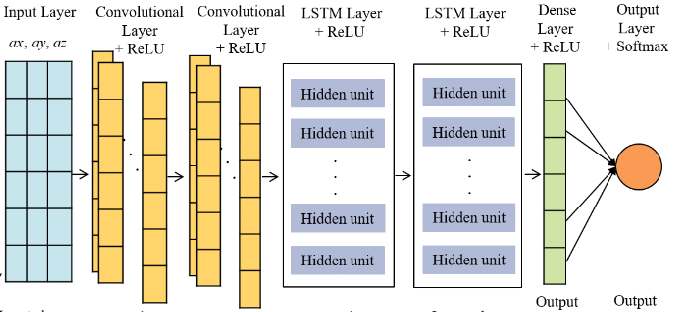

Figure 4: An overview of the C-RNN model architecture. This was used from a [previous paper](https://www.researchgate.net/figure/The-proposed-CNN-LSTM-model-architecture_fig5_356018554) that had a similar model. In my model, I only used one LSTM layer as opposed to two in the image. The paper that this image is from was researching deep learning models for human activity recognition. It is coincidental that our models shared a similar architecture.

##**Results**
>For the first round of testing, I started with 10 epochs at a batch size of 32. Unfortunately, this ended up resulting in very poor accuracy (around 10%). To further experiment, I increased the number of epochs to 100. This greatly improved the accuracy of the model, but only to just over 30% accuracy. (*Figure 5*)



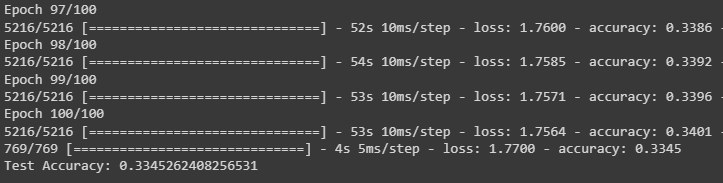

Figure 5: Test results of the initial model with only 33% accuracy. This is likely due to unoptimized hyperparameters.


>After adjusting hyperparameters such as the additional layers (dense and LSTM), decreasing the learning rate, and decreasing the batch size, the model showed instant improvements after just 2 epochs. In the end, the model was left to run for 100 epochs and ended the final accuracy of over 88% with the test dataset (*Figure 6*).


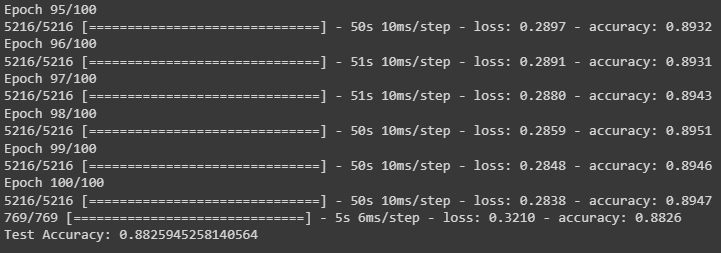

Figure 6: Test results of the final model showing over 88% accuracy.

#**Discussion**
>After the initial model with 10 epochs, I was slightly concerned that the model was not going to work out and I would have to go another direction with the project. Thankfully, I did some research on epoch sizing compared to data sizing. Ideally, I would have even more epochs since the dataset is so large. I was concerned about overfitting, but the test accuracy was similar to the accuracy of the final epochs. Optimizing hyperparameters is a common way to increase model accuracy and it seems this was the case here. Additional research into hyperparameters and other layers I could add to the model was necessary. I'm assuming model performance could be increased by adding even more epochs, however, it is not something that I thought was necessary given the model's current performance. It can be seen that around epoch 85, the model was reaching the test accuracy and somewhat stalled around 88-89% accuracy.

##**Conclusion**
>In conclusion, this project presents a successful implementation of R-CNN for decoding neural signals from the InterAxon Muse. The model, combining recurrent and convolutional architectures, showcases excellent performance in identifying trends within the encoded neural data. The preprocessing steps, using Microsoft Excel, prove effective in preparing the data for R-CNN analysis. The experimentation with hyperparameters, additional layers, and epoch adjustments significantly enhanced the model's accuracy, reaching over 88% on the test dataset. While the initial rounds of testing raised concerns, the project reinforced the importance of fine-tuning hyperparameters and the potential for further optimization. Future work may explore larger datasets and diverse stimuli for a comprehensive evaluation of the model's applicability in broader research and brain-machine interfaces. Addditional future directions could apply this model to a live brain-machine interface and evaluate the performance of the model.

##**Supplementary Figures**
>To access the file to run the data, click the link, followed by the google drive symbol in the top right corner of the screen (*Figure 7*). After this, select "All locations" and then "My Drive" (*Figure 8*). This will allow the file to be shared to your google drive and provide you with the dataset necessary to run the code.

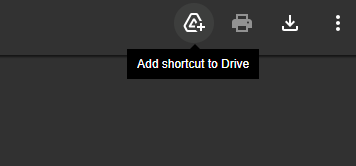

Figure 7

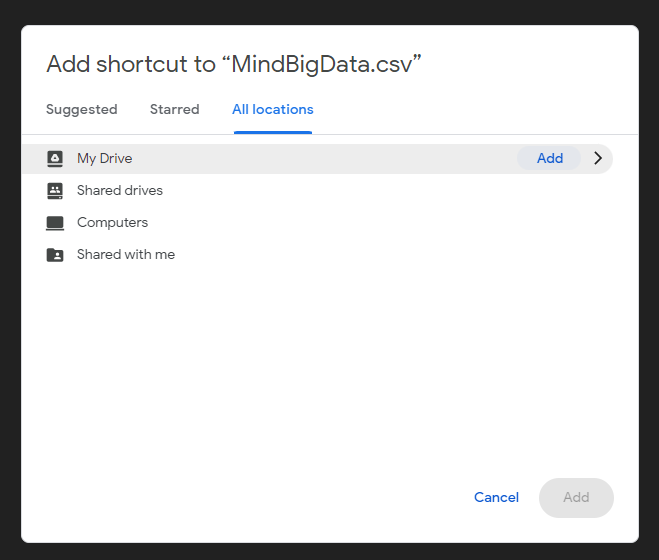

Figure 8